#  Plotting Earthquake Locations
This activity looks for patterns in data from the U.S. Geological Survey (USGS) on earthquakes and other seismic events around the world.  

To get started,
- You won't hurt anything by experimenting. If you break it, close the tab and open the activity again to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Coding activity](https://colab.research.google.com/github/adamlamee/CODINGinK12/blob/master/notebooks/intro.ipynb) and come back here. 

When you're ready, run each code cell until you get down to **Part One**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 24.7 MB/s eta 0:00:00


In [21]:
# one month of seismic data from early 2019
# data = pd.read_csv("https://github.com/adamlamee/CODINGinK12/raw/master/data/quakes.csv")

# uncomment the line below instead to use live data updated every 15 minutes
data = pd.read_csv("http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")

data.head(5) # choose to show the first (how many) lines of the file

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-01T03:23:28.190Z,38.791668,-122.816170,12.44,1.08,md,7.0,161.00,0.02304,0.0500,...,2023-03-01T03:25:03.083Z,"5km WNW of The Geysers, CA",earthquake,1.89,2.21,0.240000,8.0,automatic,nc,nc
1,2023-03-01T03:20:51.400Z,17.945000,-66.944000,10.93,2.07,md,8.0,212.00,0.04318,0.0600,...,2023-03-01T03:33:14.690Z,"4 km SW of Guánica, Puerto Rico",earthquake,1.03,0.41,0.073582,4.0,reviewed,pr,pr
2,2023-03-01T02:39:28.000Z,38.798168,-122.729668,4.32,0.80,md,11.0,110.00,0.01590,0.0100,...,2023-03-01T03:25:14.626Z,"3km SSW of Cobb, CA",earthquake,0.56,1.38,0.180000,13.0,automatic,nc,nc
3,2023-03-01T02:35:14.037Z,36.641800,-116.277900,14.10,1.00,ml,22.0,82.63,0.04900,0.3694,...,2023-03-01T02:35:57.843Z,"52 km SE of Beatty, Nevada",earthquake,NaN,0.50,0.880000,15.0,automatic,nn,nn
4,2023-03-01T02:22:54.956Z,64.997000,-147.483100,14.50,0.80,ml,NaN,NaN,NaN,0.2500,...,2023-03-01T02:27:56.109Z,Central Alaska,earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak


In [22]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(10911, 22)

## Part One
The table above shows seismic reading (vibrations in the Earth) detected any time in the past month.
- What do you think each of the column headings represent?
- How many seismic events are included in this data set?

When you're ready, run each code cell until you get down to **Part Two**.

<AxesSubplot:>

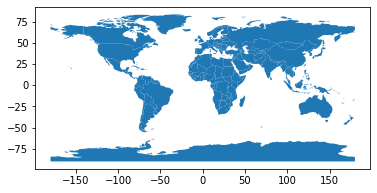

In [23]:
# makes the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

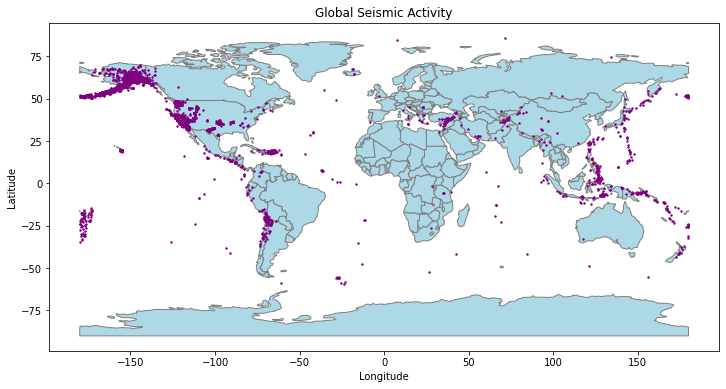

In [24]:
# choose which data to plot
plotdata = data.query('depth > 0') #depth is in km

# makes a map with those data
fig, ax = plt.subplots(figsize=(12,7))
x = plotdata['longitude']
y = plotdata['latitude']
world.plot(ax=ax, color='lightblue', edgecolor='grey')     # this part is the map
ax.scatter(x,y, s=2, color='purple')    # this adds the scatter points on top
ax.set_title('Global Seismic Activity')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.set_xlim(-160, -140)    # uncomment this and edit to zoom in
# ax.set_ylim(15, 25)        # uncomment this and edit to zoom in
plt.show()

## Part Two  
The code above make a scatterplot with a point for each seismic event in the data table.  
- Do you notice a pattern in the graph? Are any shapes familiar? 
    - Hint: uncomment the line that colors in the oceans  
- Where do seismic readings tend to occur? **Around the Pacific Ocean**
- The title and axis labels on the graph could use some work. Try editing the code above the graph, then run the code again to see the changes.  
  
## Part Three  
Now it's time to conduct your own investigation. Seismic events can be shallow (a few km) or more than 600 km deep. The code above lets you filter the data set by depth (it's called a "query").  
- Find the line that does a query on "depth".  
- Try filtering the data for only seismic events deeper than 100 km, then make a plot.  
- Do you see any pattern in where the deepest earthquakes are? **Around the Ring of Fire**
- Where do the shallowest earthquakes occur? **In North America**
- Grab the latest data instead by editing the 2nd code cell. Are most of the seismic events in the same places? **Yes**
  
---  
## Saving Your Work  
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:  
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Collaboratory". You can run it later from there.  
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)  
- File > Print to ... um ... print.  
- To save an image of a graph or chart, right-click on it and select Save Image as ...  

## Credits
The data come from the [USGS earthquakes page](http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). This notebook was created by Physics teacher and Quarknet member Peter Apps, York Middle/High School, Retsof, NY, and further developed by [Adam LaMee](https://adamlamee.github.io/). Thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device. Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org).